In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

### Linear Regression Model using system capacity (dc) as only estimator

In [29]:
df0 = pd.read_csv('data/df_kg_v1,csv',)

In [32]:
df = df0.copy()

In [33]:
df_cap = df.copy()

In [34]:
y_cap = df_cap.pop('actualkwh')

In [35]:
X_cap = df_cap.pop('capacity_dc_kw')

In [36]:
X_cap_train, X_cap_test, y_cap_train, y_cap_test = train_test_split(X_cap, y_cap, train_size=.75, test_size=.25, random_state=42)

In [44]:
linreg = LinearRegression()
linreg.fit(np.array(X_cap_train).reshape(len(X_cap_train),1), y_cap_train)
r2_cap = linreg.score(np.array(X_cap_test).reshape(len(X_cap_test),1), y_cap_test)
print('R-squared:',r2)

R-squared: 0.9374570485784582


### Linear Regression Model using all system features + KG type
(Tilt & Azimuth centered and normed)

In [45]:
df_all = df.copy()

In [46]:
y_all = df_all.pop('actualkwh')

In [47]:
X_all = df_all

In [48]:
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, train_size=.75, test_size=.25, random_state=42)

In [49]:
linreg = LinearRegression()
linreg.fit(X_all_train, y_all_train)
r2_all = linreg.score(X_all_test, y_all_test)
print('R-squared:',r2_all)

R-squared: 0.946860500423269


### Linear Regression Model using all system features + KG type
Tilt & Azimuth just centered + Dropped cell category


In [4]:
df2 = pd.read_csv('data/df_kg_v2.csv')

In [5]:
df_all2 = df2.copy()

In [6]:
y_all2 = df_all2.pop('actualkwh')

In [7]:
X_all2 = df_all2

In [8]:
X_all2_train, X_all2_test, y_all2_train, y_all2_test = train_test_split(X_all2, y_all2, train_size=.75, test_size=.25, random_state=42)

In [9]:
linreg = LinearRegression()
linreg.fit(X_all2_train, y_all2_train)
r2_all2 = linreg.score(X_all2_test, y_all2_test)
print('R-squared:',r2_all2)

R-squared: 0.9467465242290434


### Linear Regression Model using all system features + KG type

(Tilt & Azimuth just centered) + (StandardScaler applied to X data)


In [10]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_all2))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_all2, train_size=.75, test_size=.25, random_state=42)

In [12]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
r2 = linreg.score(X_test, y_test)
print('R-squared:',r2)

R-squared: 0.9467465242290434


In [13]:
y_pred = linreg.predict(X_test)
lr_mse = mean_squared_error(y_test,y_pred)
lr_mse**.5

109619.60875745155

Text(0.5,0,'Coefficient Value')

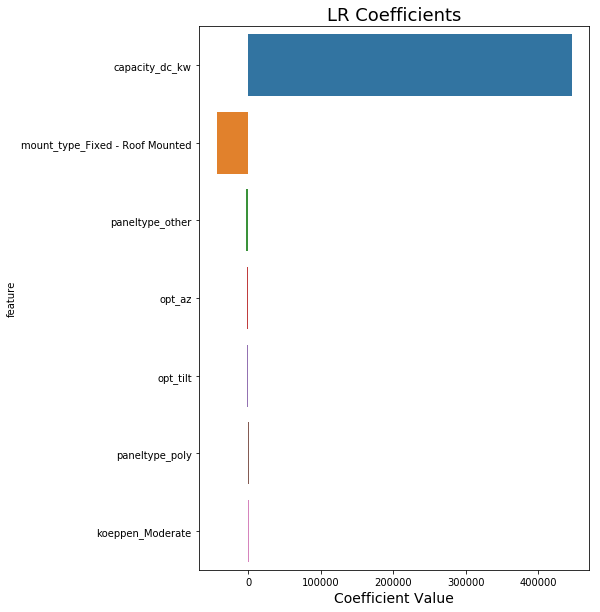

In [19]:
coefs = pd.DataFrame({
    'feature': X_all2.columns,
    'coefficient': linreg.coef_,
    'abs_coef': np.abs(linreg.coef_)
})
coefs.sort_values('abs_coef', inplace=True, ascending=False)

plt.figure(figsize=(7,10))
sns.barplot(x=coefs.coefficient.head(16), y=coefs.feature.head(16), orient='h')
plt.title("LR Coefficients", fontsize='18')
plt.xlabel('Coefficient Value', fontsize='14')

In [20]:
coefs

,feature,coefficient,abs_coef
0,capacity_dc_kw,446115.103589,446115.103589
3,mount_type_Fixed - Roof Mounted,-43901.260626,43901.260626
5,paneltype_other,-3090.548800,3090.548800
2,opt_az,-1766.427728,1766.427728
1,opt_tilt,-1754.502334,1754.502334
6,paneltype_poly,531.265930,531.265930
4,koeppen_Moderate,351.233770,351.233770


### Linear Regression Model using all system features + KG type + NASA POWER

(Tilt & Azimuth just centered) + (StandardScaler applied to X data)


In [21]:
df0 = pd.read_csv('data/df_kgnasa.csv')
df = df0.copy()
y = df.pop('actualkwh')
X = df

In [22]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=.75, test_size=.25, random_state=42)

In [24]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
r2 = linreg.score(X_test, y_test)
print('R-squared:',r2)

R-squared: 0.9473734982640887


In [25]:
y_pred = linreg.predict(X_test)
lr_mse = mean_squared_error(y_test,y_pred)
lr_mse**.5

108972.40085768409

Text(0.5,0,'Coefficient Value')

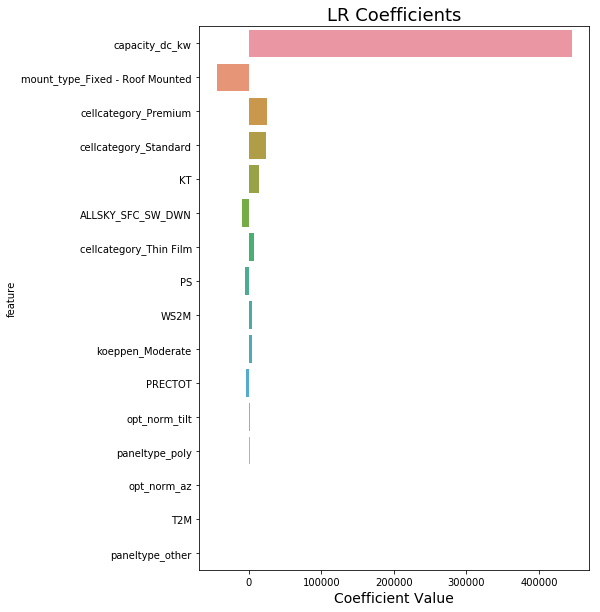

In [28]:
coefs = pd.DataFrame({
    'feature': X.columns,
    'coefficient': linreg.coef_,
    'abs_coef': np.abs(linreg.coef_)
})
coefs.sort_values('abs_coef', inplace=True, ascending=False)

plt.figure(figsize=(7,10))
sns.barplot(x=coefs.coefficient.head(16), y=coefs.feature.head(16), orient='h')
plt.title("LR Coefficients", fontsize='18')
plt.xlabel('Coefficient Value', fontsize='14')

In [29]:
coefs

,feature,coefficient,abs_coef
0,capacity_dc_kw,445005.737933,445005.737933
3,mount_type_Fixed - Roof Mounted,-44341.382864,44341.382864
7,cellcategory_Premium,25638.021095,25638.021095
8,cellcategory_Standard,23748.150118,23748.150118
11,KT,13569.118405,13569.118405
10,ALLSKY_SFC_SW_DWN,-9553.605501,9553.605501
9,cellcategory_Thin Film,6789.234157,6789.234157
13,PS,-5132.622782,5132.622782
15,WS2M,4174.525849,4174.525849
4,koeppen_Moderate,3830.360400,3830.360400
